In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

palette = sns.husl_palette(s=1)
sns.set(style='whitegrid', palette=palette, context='talk')

### Load data

In [2]:
df = pd.read_csv('train.csv', parse_dates=True)
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [3]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


### Train-test-split

In [4]:
X = df.iloc[:,:]
y = df['count']

from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=4)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((8708, 12), (2178, 12), (8708,), (2178,))

### Exploratory data analysis

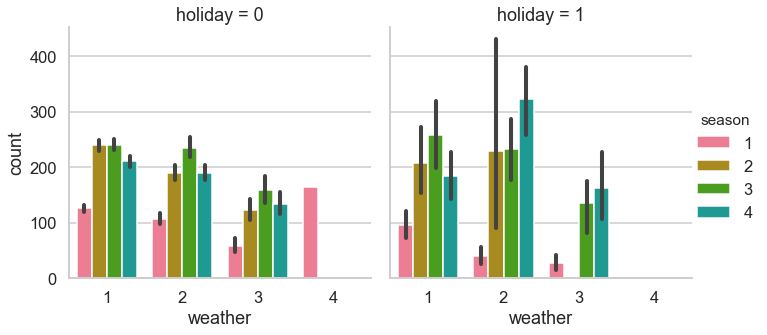

In [5]:
g = sns.catplot(x='weather', y='count', kind='bar', hue = 'season', col = 'holiday', data=X_train)

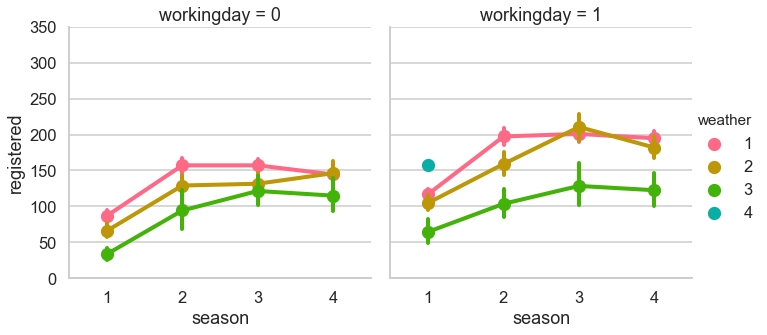

In [6]:
# Registered users
g = sns.catplot(x='season', y='registered', kind='point', hue = 'weather', col = 'workingday', data=X_train)
g.set(ylim=(0, 350))

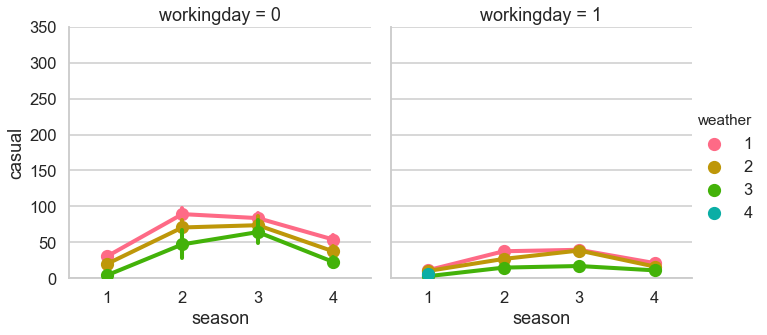

In [7]:
# Casual users
g = sns.catplot(x='season', y='casual', kind='point', hue = 'weather', col = 'workingday', data=X_train)
g.set(ylim=(0, 350))

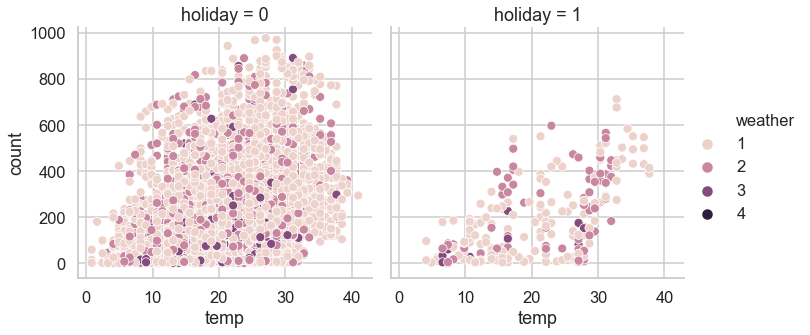

In [8]:
sns.relplot(x="temp", y="count", hue="weather", col="holiday", data=X_train)

In [9]:
#sns.pairplot(data=X_train)

## Feature Engineering

In [44]:
X_train['atemp_shift'] = abs(X_train['atemp'] - 35)

/Users/julia/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [10]:
X_train['datetime'] = pd.to_datetime(X_train['datetime'])
X_train[['datetime']]

/Users/julia/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,datetime
3036,2011-07-15 10:00:00
4817,2011-11-13 19:00:00
5745,2012-01-14 13:00:00
2327,2011-06-04 21:00:00
2838,2011-07-07 04:00:00
...,...
6017,2012-02-06 23:00:00
709,2011-02-12 21:00:00
10679,2012-12-11 09:00:00
8366,2012-07-09 23:00:00


In [11]:
# Extract all time information
X_train['datetime_hour'] = X_train.loc[:,'datetime'].dt.hour # important _ onehot
X_train['datetime_day'] = X_train['datetime'].dt.day
X_train['datetime_month'] = X_train['datetime'].dt.month # use month as onehot or factorized instead of season
X_train['datetime_year'] = X_train['datetime'].dt.year # maybe instead of timestamp
X_train['datetime_weekdays'] = X_train['datetime'].dt.day_name()
X_train['timestamp'] = X_train['datetime'].astype(int) / 1_000_000_000_000_000_000 # use to account for increasing count over time

/Users/julia/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/julia/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/julia/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

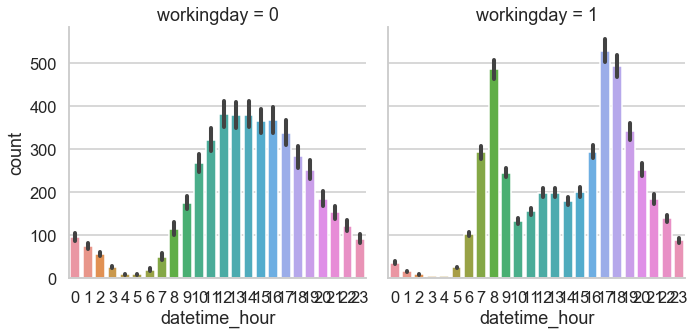

In [12]:
g = sns.catplot(x='datetime_hour', y='count', kind='bar', col = 'workingday', data=X_train)

#### One-hot encoding

In [13]:
X_train['hour_workday'] = X_train['datetime_hour'] * X_train['workingday']
X_train['hour_weekend'] = X_train['datetime_hour'] * (X_train['workingday'] - 1) * (-1)
X_train

/Users/julia/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/julia/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,datetime_hour,datetime_day,datetime_month,datetime_year,datetime_weekdays,timestamp,hour_workday,hour_weekend
3036,2011-07-15 10:00:00,3,0,1,2,27.06,31.060,61,11.0014,59,107,166,10,15,7,2011,Friday,1.310724,10,0
4817,2011-11-13 19:00:00,4,0,0,1,20.50,24.240,29,23.9994,36,121,157,19,13,11,2011,Sunday,1.321211,0,19
5745,2012-01-14 13:00:00,1,0,0,1,9.02,10.605,44,19.0012,38,182,220,13,14,1,2012,Saturday,1.326546,0,13
2327,2011-06-04 21:00:00,2,0,0,2,27.06,31.060,47,7.0015,46,139,185,21,4,6,2011,Saturday,1.307221,0,21
2838,2011-07-07 04:00:00,3,0,1,1,26.24,28.790,89,7.0015,0,4,4,4,7,7,2011,Thursday,1.310011,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6017,2012-02-06 23:00:00,1,0,1,1,12.30,15.150,65,8.9981,3,43,46,23,6,2,2012,Monday,1.328569,23,0
709,2011-02-12 21:00:00,1,0,0,1,10.66,15.150,41,0.0000,9,42,51,21,12,2,2011,Saturday,1.297544,0,21
10679,2012-12-11 09:00:00,4,0,1,1,13.94,15.150,61,26.0027,12,322,334,9,11,12,2012,Tuesday,1.355216,9,0
8366,2012-07-09 23:00:00,3,0,1,2,28.70,32.575,65,7.0015,22,109,131,23,9,7,2012,Monday,1.341875,23,0


In [14]:
from sklearn.preprocessing import OneHotEncoder

ohc = OneHotEncoder(sparse=False, handle_unknown='ignore')
ohc.fit(X_train[['datetime_month', 'weather', 'hour_workday', 'hour_weekend']])
onehot = ohc.transform(X_train[['datetime_month', 'weather', 'hour_workday', 'hour_weekend']])
onehot_columns = ohc.get_feature_names(['month', 'weather', 'hour_workday', 'hour_weekend'])

onehot = pd.DataFrame(onehot, columns=onehot_columns)

In [15]:
onehot

,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,...,hour_weekend_14,hour_weekend_15,hour_weekend_16,hour_weekend_17,hour_weekend_18,hour_weekend_19,hour_weekend_20,hour_weekend_21,hour_weekend_22,hour_weekend_23
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8703,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8704,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8705,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8706,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Set up the model

In [16]:
from sklearn.linear_model import LinearRegression

In [45]:
X_train_model = X_train.reset_index()[['timestamp','workingday', 'atemp_shift', 'humidity', 'windspeed']]
X_train_model_onehot = pd.concat([X_train_model, onehot], axis=1)
onehot.shape, X_train_model.shape, X_train_model_onehot.shape

((8708, 64), (8708, 5), (8708, 69))

#### Scale the data

In [46]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler() # scales each column to minimum 0.0 and maximum 1.0. Makes sure all data fits together.
#scaler.fit(X_train_model_onehot)
#X_scaled = scaler.transform(X_train_model_onehot) # later just use transform on X_test, DO NOT FIT AGAIN

In [47]:
lr = LinearRegression()
lr.fit(X_train_model_onehot, np.log(y_train+1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [48]:
X_train_model_onehot.shape, y_train.shape

((8708, 69), (8708,))

In [49]:
lr.score(X_train_model_onehot, np.log(y_train+1))

0.9401728838173016

Cross validation

In [39]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lr, X_train_model_onehot, np.log(y_train+1), cv=4, scoring='r2')
scores

array([-1.19332016e+16,  9.35998150e-01,  9.33810715e-01,  9.36812759e-01])

In [40]:
scores.mean().round(3), scores.std().round(3)

(-2983300392946466.0, 5167227854823476.0)

In [50]:
X_train['count_pred'] = np.exp(lr.predict(X_train_model_onehot))
X_train['count_pred']

/Users/julia/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


3036     126.489153
4817     226.692284
5745     187.967127
2327     141.624929
2838       5.646119
            ...    
6017      58.719789
709       65.548653
10679    291.313594
8366     132.765970
1146     113.584147
Name: count_pred, Length: 8708, dtype: float64

In [51]:
from sklearn.metrics import mean_squared_log_error
np.sqrt(mean_squared_log_error(y_train, X_train['count_pred']))

0.3506224583298729

In [52]:
from sklearn.metrics import r2_score
r2_score(y_train, X_train['count_pred'])

0.9040010565096611

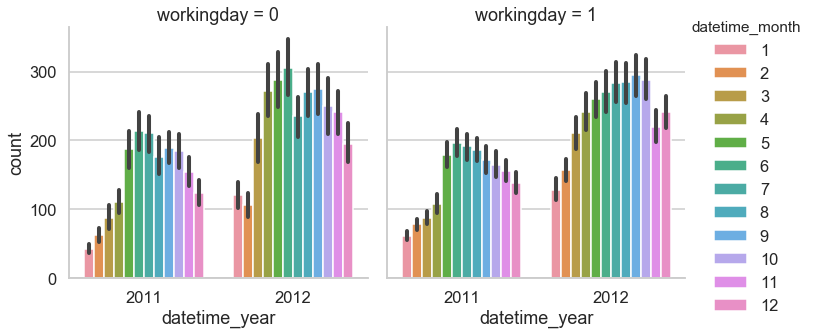

In [26]:
g = sns.catplot(x='datetime_year', y='count', kind='bar', hue = 'datetime_month', col = 'workingday', data=X_train)

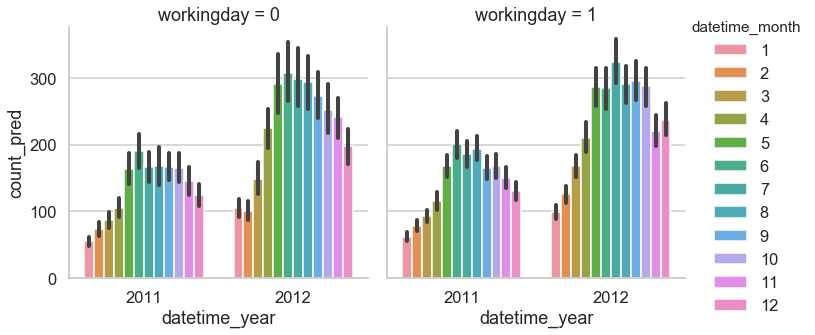

In [27]:
g = sns.catplot(x='datetime_year', y='count_pred', kind='bar', hue = 'datetime_month', col = 'workingday', data=X_train)

In [28]:
lr.coef_

array([ 1.52894662e+01, -1.00047112e+00,  1.22838677e-02,  1.28784894e-02,
       -2.50695700e-03, -3.93018191e-03, -2.09032090e+10, -2.09032090e+10,
       -2.09032090e+10, -2.09032090e+10, -2.09032090e+10, -2.09032090e+10,
       -2.09032090e+10, -2.09032090e+10, -2.09032090e+10, -2.09032090e+10,
       -2.09032090e+10, -2.09032090e+10,  6.45379471e+09,  6.45379471e+09,
        6.45379471e+09,  6.45379471e+09,  1.78410788e+09,  1.78410788e+09,
        1.78410788e+09,  1.78410788e+09,  1.78410788e+09,  1.78410788e+09,
        1.78410788e+09,  1.78410788e+09,  1.78410789e+09,  1.78410788e+09,
        1.78410788e+09,  1.78410788e+09,  1.78410788e+09,  1.78410788e+09,
        1.78410788e+09,  1.78410788e+09,  1.78410788e+09,  1.78410789e+09,
        1.78410789e+09,  1.78410788e+09,  1.78410788e+09,  1.78410788e+09,
        1.78410788e+09,  1.78410788e+09, -7.65913618e+08, -7.65913619e+08,
       -7.65913619e+08, -7.65913620e+08, -7.65913621e+08, -7.65913621e+08,
       -7.65913620e+08, -

In [29]:
X_train['count_residual'] = X_train['count_pred'] - X_train['count'] 

/Users/julia/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


(734381.0, 734442.0)

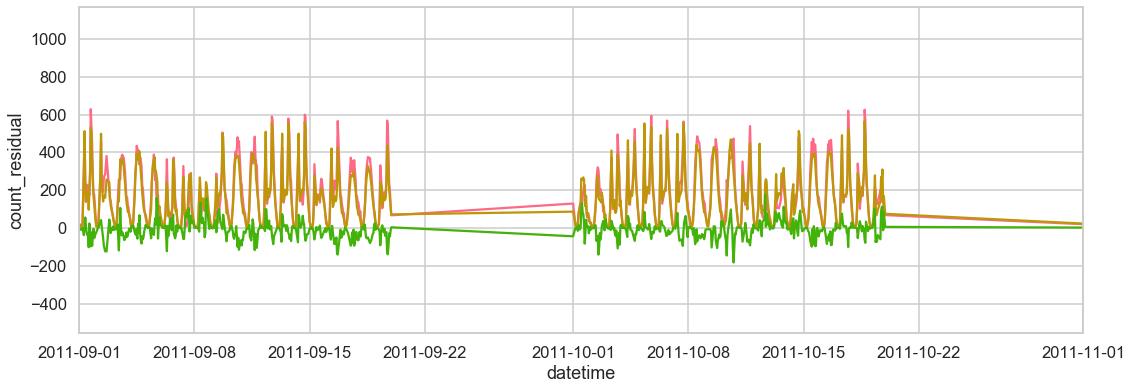

In [30]:
fig = plt.figure(figsize=(18,6))
ax = sns.lineplot(x='datetime', y='count', data=X_train)
ax = sns.lineplot(x='datetime', y='count_pred', data=X_train)
ax = sns.lineplot(x='datetime', y='count_residual', data=X_train)
ax.set_xlim(pd.Timestamp('2011-09-01'), pd.Timestamp('2011-11-01'))
#ax.set(xlim=(2011, 2013))

In [31]:
X_train['count_residual'].min(), X_train['count_residual'].max(),  X_train['count_residual'].isna().sum()

(-476.7655039463766, 537.8555422116855, 0)

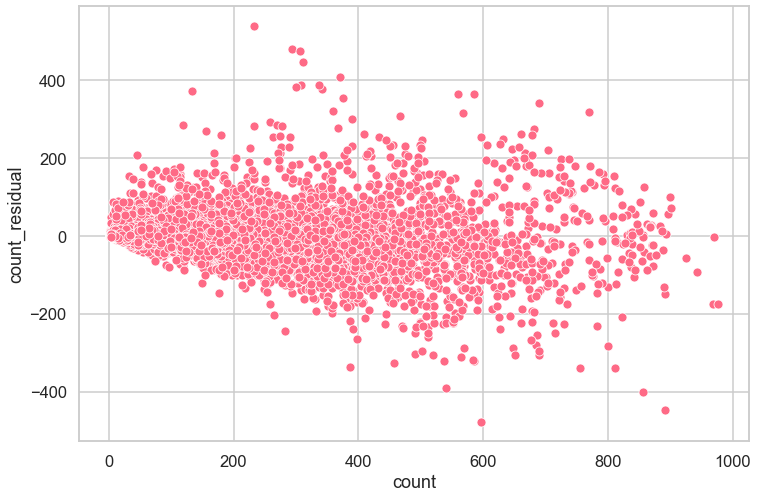

In [32]:
fig = plt.figure(figsize=(12,8))
ax = sns.scatterplot(x='count', y='count_residual', data=X_train)